In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_data/training_walks.csv')
df

,Unnamed: 0,transmitter,walk,i,j,rssi,tx_location_i,tx_location_j
0,0,tx0,0,2214,1812,-1000.000000,1716,1337
1,1,tx0,0,2209,1812,-1000.000000,1716,1337
2,2,tx0,0,2209,1817,-1000.000000,1716,1337
3,3,tx0,0,2209,1822,-1000.000000,1716,1337
4,4,tx0,0,2204,1822,-1000.000000,1716,1337
...,...,...,...,...,...,...,...,...
1599995,1599995,tx4,31,2831,813,-124.810394,2732,561
1599996,1599996,tx4,31,2836,813,-131.813080,2732,561
1599997,1599997,tx4,31,2836,818,-123.708595,2732,561
1599998,1599998,tx4,31,2836,823,-134.277020,2732,561


In [3]:
signal_received = df[df['rssi'] != -1000.0].copy()
signal_not_received = df[df['rssi'] == -1000.0].copy()

df_signal = signal_received
tx_signal = df_signal[df_signal['transmitter'] == 'tx2'].copy()
print(tx_signal['rssi'].max())

-79.638084


### Map Testing

In [4]:
# OFFICIAL SAM FUNCTIONS FROM NOTEBOOK
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

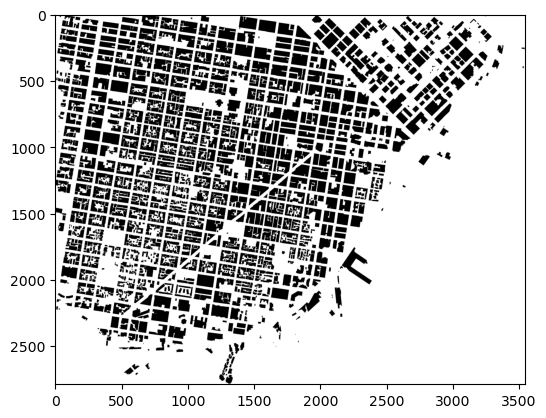

In [5]:
test_img = cv.imread("train_data/walkable_mask.png")
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
plt.imshow(test_img)

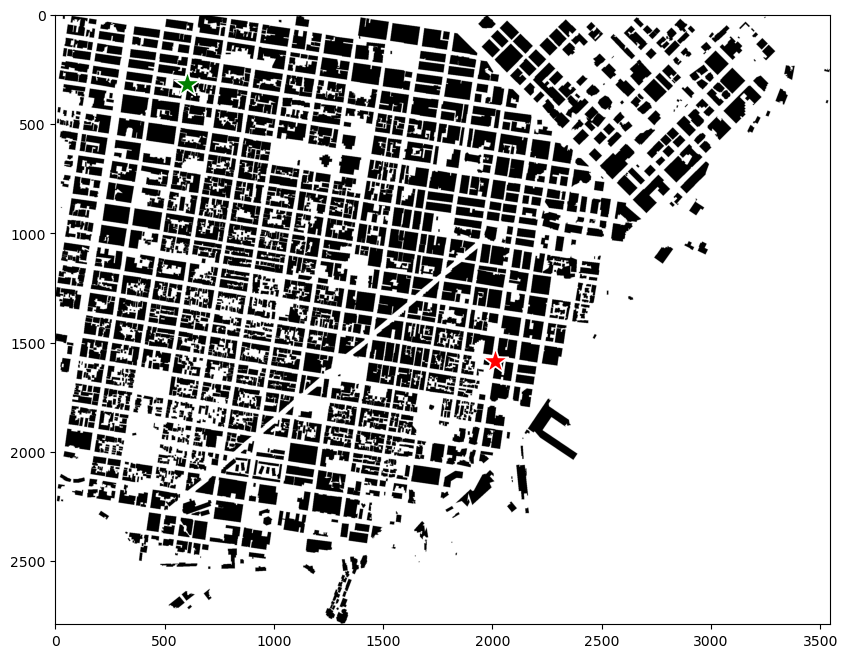

[0 0 0]


In [11]:
df_signal = tx_signal

ground_truth = [df_signal.iloc[0]['tx_location_i'], df_signal.iloc[0]['tx_location_j']]
input_points = [ground_truth]
input_labels = [1]

ts = np.arange(0, len(df_signal), 10000)
for t in ts:
    present_loc = [df_signal.iloc[t]['i'], df_signal.iloc[t]['j']]
    input_points.append(present_loc)
    input_labels.append(0)

input_points = np.array(input_points)
input_labels = np.array(input_labels)

plt.figure(figsize=(10,10))
plt.imshow(test_img)
show_points(input_points, input_labels, plt.gca())
plt.axis('on')
plt.show()

print(test_img[input_points[0][0], input_points[0][1]])